# Project - Laptop Price Predictor

In [2]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('laptop_data.csv')

In [4]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [ ]:
Perform some basic commands on dataframe

In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


# 1. Check duplicate rows

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)   # unwanted columns dropped down

In [153]:
df.head(2)

In [15]:
df['Ram'].str.replace('GB','')

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [16]:
df['Ram'] = df['Ram'].str.replace('GB','')     # replace original column with this new 

In [17]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [18]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [19]:
# but dtype od ram and weight is object,  lets change the datatypes

In [20]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## Now we will perform some EDA

# Univariate

<AxesSubplot:xlabel='Price', ylabel='Density'>

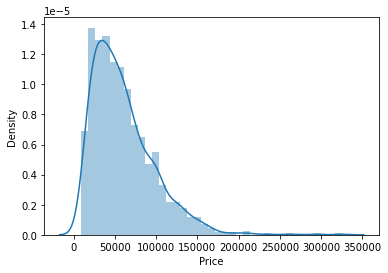

In [22]:
import seaborn as sns
sns.distplot(df['Price'])

<AxesSubplot:>

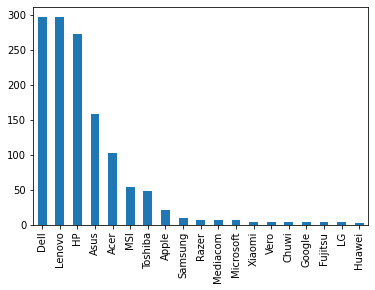

In [23]:
df['Company'].value_counts().plot(kind='bar')

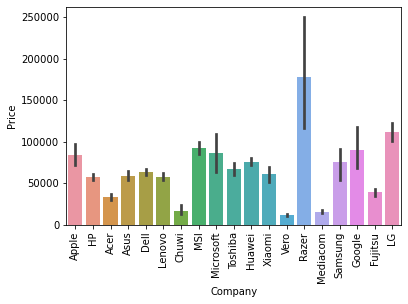

In [24]:
import matplotlib.pyplot as plt

sns.barplot(x = df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

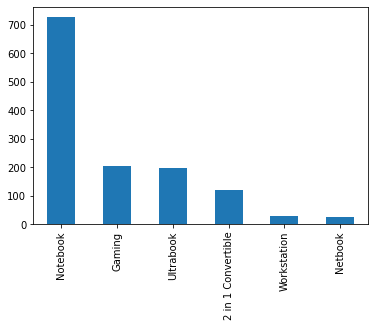

In [25]:
df['TypeName'].value_counts().plot(kind='bar')

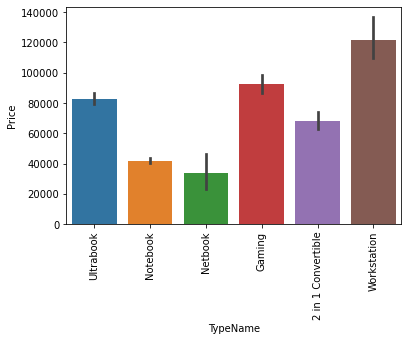

In [26]:
sns.barplot(x = df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

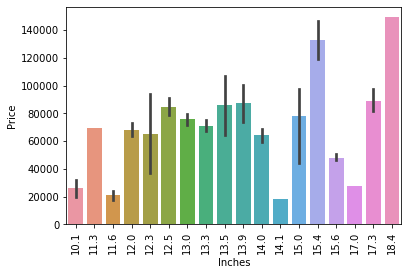

In [27]:
sns.barplot(x = df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

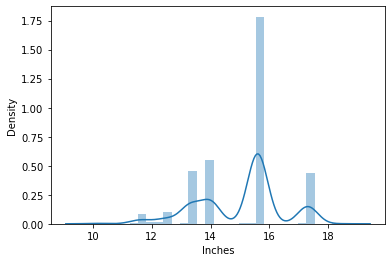

In [28]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

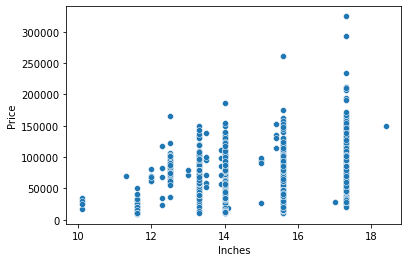

In [29]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [30]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [31]:
# we are creating new column for lptp touchscreen or not

In [32]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [33]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


In [34]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18,32713.9200,0
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,0
877,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.8000,0
782,Toshiba,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,1.47,93985.9200,0
773,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,58554.7200,0


<AxesSubplot:>

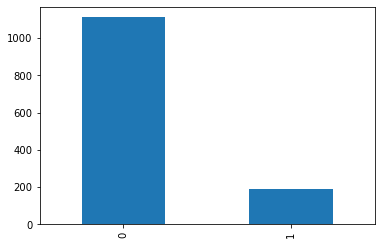

In [35]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

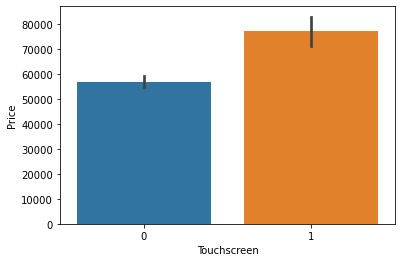

In [36]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [37]:
# we again create one columns if lptp have a IPS panel or not

In [38]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [39]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1217,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,28717.9200,0,0
608,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.00,69210.7200,1,1
519,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3.00,80133.1200,0,0
1182,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GT 940MX,Linux,1.98,47686.1328,0,0
336,Dell,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,1.90,55890.7200,0,1


<AxesSubplot:>

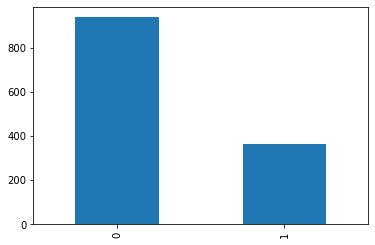

In [40]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

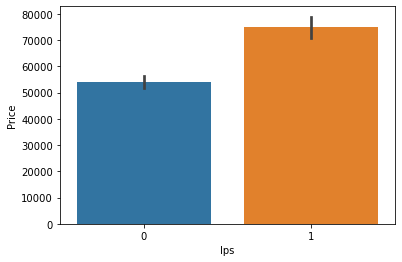

In [41]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [42]:
# again one column for resolution from screenresolution

In [43]:
df['ScreenResolution'].str.split('x',n=1, expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [44]:
new = df['ScreenResolution'].str.split('x',n=1, expand=True)

In [45]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [46]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
308,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,43636.32,0,0,Full HD 1920,1080
1107,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.10,46193.76,1,1,IPS Panel Full HD / Touchscreen 1920,1080
16,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,39693.60,0,0,Full HD 1920,1080
296,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.12,0,0,Full HD 1920,1080
948,Dell,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,35111.52,0,0,1600,900


In [47]:
# we can see our Y_res is ok, but x_res is not at required,   so we will use some regular expression here,,

In [48]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1298    [1920]
1299    [3200]
1300    [1366]
1301    [1366]
1302    [1366]
Name: X_res, Length: 1303, dtype: object

In [49]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [50]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [51]:
df.sample(5)    # for random rows

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
60,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.72,0,0,1920,1080
209,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,31808.16,0,0,1366,768
1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.12,0,1,1920,1080
878,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,48618.00,0,0,1920,1080
926,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87912.00,0,1,1920,1080


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


In [53]:
df['X_res'] = df['X_res'].astype('int64')

In [54]:
df['Y_res'] = df['Y_res'].astype('int64')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [56]:
# we want to see correlation of X_res

In [57]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [58]:
# by using Inches, X_res, Y_res  we will creat new column ppi , (pixel per inches)

In [59]:
# formula for ppi

((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Length: 1303, dtype: float64

In [60]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [61]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [62]:
# we have been extracted all required info from ScreenResolution column,  so now we will drop this column

In [63]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [64]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
74,Acer,Notebook,14.0,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.10,20725.920,0,0,1366,768,111.935204
360,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.920,0,0,1366,768,100.454670
888,Acer,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.160,0,1,1366,768,135.094211
1025,HP,Ultrabook,12.5,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,83063.520,0,0,1366,768,125.367428
723,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,194972.832,0,0,3840,2160,254.671349


In [65]:
# As we have ppi , then there is no requirement of columns such as Inches, X_res, Y_res, so will drop this also

In [66]:
df.drop(columns=['Inches','X_res', 'Y_res'], inplace=True)

In [67]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
133,Acer,Notebook,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,2.20,30476.16,0,0,141.211998
839,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB HDD,Intel HD Graphics 620,Windows 10,2.30,31435.20,0,0,141.211998
662,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,28504.80,0,0,141.211998
407,Dell,Ultrabook,Intel Core i7 7600U 2.8GHz,8,512GB SSD,Intel HD Graphics,Windows 10,1.36,89510.40,0,0,157.350512
439,Asus,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.00,29783.52,0,0,141.211998


# move on next column . i.e Cpu

In [68]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [69]:
# we need to do some feature enginering on this column also

In [70]:
df['Cpu'].apply(lambda x:x.split()[0:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [71]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:x.split()[0:3])    # but this is in list, so for converting into string

In [72]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
126,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.63,43263.36,0,0,157.350512,"[Intel, Core, i5]"


In [73]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) # convert ed into string

In [74]:
df.sample(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
775,Asus,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.3,44701.92,1,0,141.211998,Intel Core i7


In [75]:
# again simplify Cpu_Name column

In [76]:
def fetch_processor(text):
    if text =='Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else: 
            return 'AMD Processor'

In [77]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [78]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
457,Microsoft,Ultrabook,Intel Core M m3-7Y30 2.2GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252,52693.92,1,0,200.842560,Intel Core M,Other Intel Processor
580,Mediacom,Notebook,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.450,20725.92,0,1,157.350512,Intel Celeron Quad,Other Intel Processor
931,HP,Ultrabook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.260,84129.12,0,0,176.232574,Intel Core i5,Intel Core i5
284,Acer,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.000,50669.28,0,1,141.211998,Intel Core i7,Intel Core i7
250,Dell,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.080,43636.32,1,1,141.211998,Intel Core i7,Intel Core i7


<AxesSubplot:>

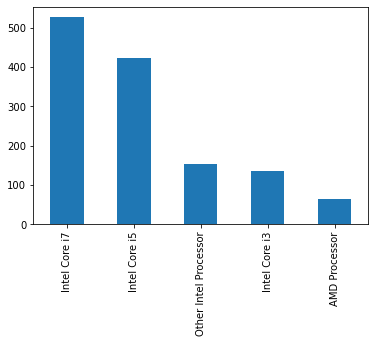

In [79]:
df['Cpu Brand'].value_counts().plot(kind='bar')

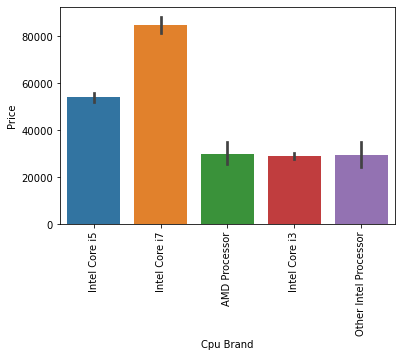

In [80]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical');

In [81]:
# now we will drop Cpu and Cpu Name column

In [82]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [83]:
df.sample(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
693,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,137995.2,1,0,209.800683,Intel Core i7


# move on towards Ram

<AxesSubplot:>

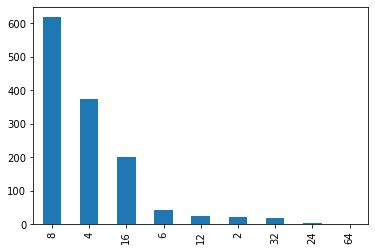

In [84]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

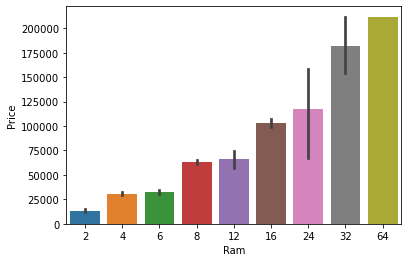

In [85]:
sns.barplot(x=df['Ram'], y=df['Price'])   # we can see ram column is very imp for our analysis

# So move on Memory column

In [86]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [87]:
# now we will transform this column into 4 new columns , HDD, SSD, Flash , Hybrid

In [88]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB','')
new = df['Memory'].str.split("+",n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()

df["second"] = new[1]

df['Layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["first"] = df["first"].str.replace(r'\D','')

df["second"].fillna("0", inplace=True)

df['Layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["second"] = df["second"].str.replace(r'\D','')

df["first"] = df["first"].astype('int64')
df["second"] = df["second"].astype('int64')

df["HDD"] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df["SSD"] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df["Hybrid"] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])
df["Flash_Storage"] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])

df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage', 
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'], inplace=True)



In [89]:
df.sample(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
791,Vero,Notebook,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.22,10810.5120,0,0,157.350512,Other Intel Processor,0,0,0,32
1139,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.88,115709.2416,0,0,141.211998,Intel Core i7,0,256,0,0


In [90]:
df.drop(columns=['Memory'], inplace=True)

In [91]:
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
873,Lenovo,Notebook,4,Intel HD Graphics 620,Windows 10,1.44,39160.80,0,1,165.632118,Intel Core i3,0,180,0,0
591,Lenovo,Notebook,12,AMD Radeon 530,Windows 10,2.20,50562.72,0,0,141.211998,AMD Processor,0,512,0,0


In [92]:
# now we will see correlation of new 4 columns

In [93]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.234901
SSD              0.547358
Hybrid          -0.004769
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [94]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)    # because it is not correlated price 

In [95]:
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256


# Now we will move on Gpu

In [96]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [97]:
# now we will extract brand name from Gpu

In [98]:
df['Gpu'].apply(lambda x:x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [99]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [100]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [101]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [102]:
df = df[df['Gpu brand'] != 'ARM']  # dropped one row

In [103]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

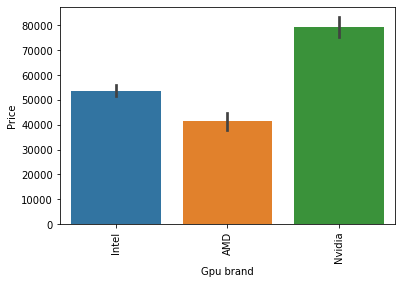

In [104]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

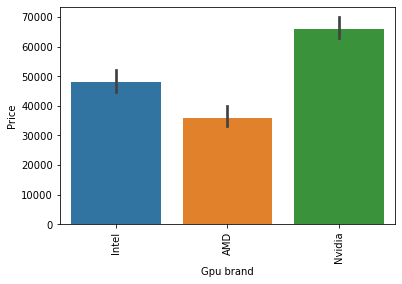

In [105]:
sns.barplot(x=df['Gpu brand'],y=df['Price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
df.sample(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand
545,HP,Notebook,4,Intel HD Graphics 620,Windows 10,2.1,37589.04,0,0,141.211998,Intel Core i3,0,128,Intel
412,HP,Notebook,4,AMD Radeon 520,Windows 10,2.1,24988.32,0,0,141.211998,Intel Core i3,1,0,AMD


In [107]:
df.drop(columns=['Gpu'], inplace=True)

In [108]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


 # Now move on OpSys column

In [109]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

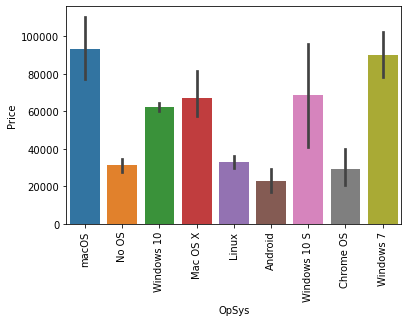

In [110]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
# so now categorise these different Op sys

In [112]:
def cat_os(inp):
    if inp == 'Windows 10' or inp =='Windows 7' or inp== 'Windows 10 S':
        return 'Windows'
    elif inp =='macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [113]:
df['os'] = df['OpSys'].apply(cat_os)

In [114]:
df.sample(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
402,Lenovo,Notebook,8,Windows 10,2.1,60978.96,0,1,141.211998,Intel Core i5,1,256,AMD,Windows
499,Lenovo,Notebook,8,Windows 10,2.3,48538.08,0,1,141.211998,Intel Core i5,0,256,Intel,Windows


In [115]:
df.drop(columns=['OpSys'], inplace=True)

In [116]:
df.sample(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
831,Lenovo,Ultrabook,16,1.1,111834.72,0,1,209.800683,Intel Core i7,0,512,Intel,Windows
1245,Asus,Gaming,16,2.5,85248.00,0,1,141.211998,Intel Core i7,1,256,Nvidia,Windows


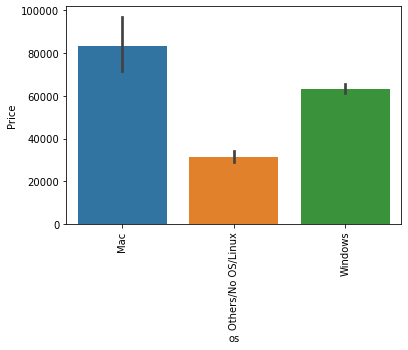

In [117]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Now move on Weight column

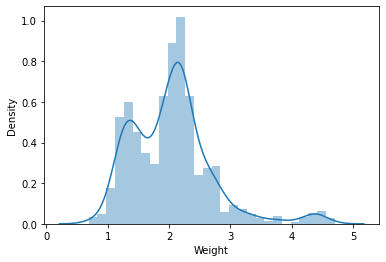

In [118]:
sns.distplot(df['Weight']);

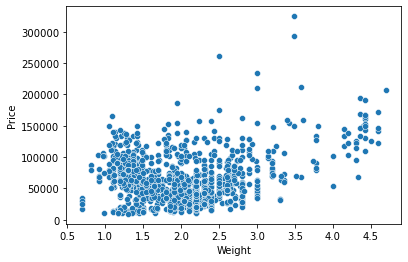

In [119]:
sns.scatterplot(x=df['Weight'], y=df['Price']);

In [120]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.235127
SSD            0.547147
Name: Price, dtype: float64

In [121]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,-0.269157,0.464097
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.019509,-0.095885
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.235127,0.547147
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.120026,0.218344
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.171998,0.219554
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.261222,0.416973
HDD,-0.269157,0.019509,-0.235127,-0.120026,-0.171998,-0.261222,1.000000,-0.347984
SSD,0.464097,-0.095885,0.547147,0.218344,0.219554,0.416973,-0.347984,1.000000


<AxesSubplot:>

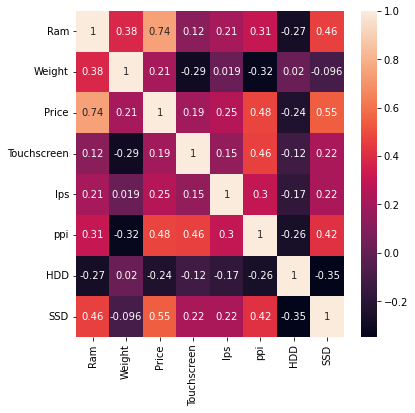

In [122]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

In [123]:
# At starting we had seened our dataset is slightly skewed, it is required to be in normal, so do this by log transform

<AxesSubplot:xlabel='Price', ylabel='Density'>

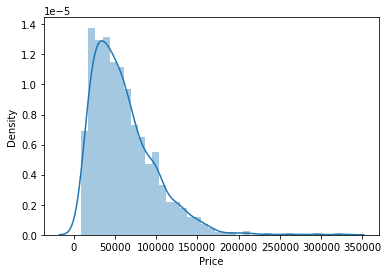

In [124]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

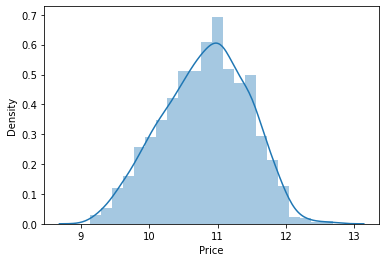

In [125]:
# as we can see skewed , so lets normalize it

sns.distplot(np.log(df['Price']))

In [126]:
# it becomes normal distribution

In [127]:
X = df.drop(columns=['Price'])
y= np.log(df['Price'])

In [128]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1,0,AMD,Windows


In [129]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# now train test split

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [131]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2,0,Nvidia,Others/No OS/Linux


# Handling Categorical variable columns,  by one hot encoding

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [133]:
# Import all Regressor algorithms

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor

# 1.LinearRegression

In [134]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8074506018049022
MAE 0.2122503952385465


In [135]:
np.exp(0.21)

1.2336780599567432

# we will do same for other techniques also

# 2. Lasso Regression

In [136]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.811754271794283
MAE 0.21205015306623548


# 3. Lasso regression

In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = Lasso(0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8064891585365469
MAE 0.213768247710368


# 4. KNN 

In [138]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8454734994948784
MAE 0.18492764033591505


# 5. Decision Tree 

In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8435243002848313
MAE 0.1844079917348368


# 6. Support Vector Machine SVR

In [140]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = SVR(kernel='rbf',C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7866502172036324
MAE 0.19257266692009348


# 7. Extra Tree Regressor

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8675695120219593
MAE 0.1647464237617599


# 8. Ada Boost Regressor

In [142]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=18, learning_rate=0.95)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7994748643777558
MAE 0.22813957593189266


# 9. GradientBoostingRegressor

In [143]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.874759129389938
MAE 0.16101420951437317


# 10. XGB Regressor

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = XGBRegressor(n_estimators=100, max_depth=15,learning_rate=0.2)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.881576199606356
MAE 0.15556136763391942


# 11. Voting Regressor

In [145]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')


gbr = GradientBoostingRegressor(n_estimators=500)
rf = step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
etr = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15)
xgbr = XGBRegressor(n_estimators=100, max_depth=15,learning_rate=0.2)

step2 = VotingRegressor([('rf',rf),('gbr',gbr), ('xgbr', xgbr), ('etr', etr)], weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8906048372948088
MAE 0.15404632980067784


# 12. StackingRegressor

In [146]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')
# gbr = GradientBoostingRegressor(n_estimators=500)
# rf = step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# etr = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15)
# xgbr = XGBRegressor(n_estimators=100, max_depth=15,learning_rate=0.2)

estimators=[
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbr', GradientBoostingRegressor(n_estimators=100,max_features=0.5 )),
     ('xgbr', XGBRegressor(n_estimators=25, max_depth=15,learning_rate=0.2))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8805447964128357
MAE 0.16499659986502355


# 13. RandomForestRegressor

In [147]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=250,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.15,
                              max_depth=28)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8979050104846402
MAE 0.15129459164829062


# As expected: our r2score is higher in Random Forest Regressor algorithm than rest of all . i.e. 89.79 

Towards deployment

# Exporting the Model

In [151]:
X_train.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.0,0,0,100.45467,Intel Core i5,0,128,Intel,Windows


# Code for making app with the help of streamlit 

In [148]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
'''import streamlit as st
import pickle
import numpy as np
# Import model
pipe = pickle.load(open('pipe.pkl', 'rb'))
df = pickle.load(open('df.pkl', 'rb'))


st.title("Laptop Price Predictor")

# Brand
Company = st.selectbox('Brand', df['Company'].unique())
# type of laptop
Type = st.selectbox('Type', df['TypeName'].unique())
# Ram
Ram = st.selectbox('Ram(in GB)',[2,4,6,8,12,16,24,32,64])
# Weight
Weight =  st.number_input('Weight of the Laptop')
# Touchscreen or not
Touchscreen = st.selectbox('Touchscreen', ['No', 'Yes'])
# IPS
ips = st.selectbox('IPS',['No', 'Yes'])

# for calculating ppi
# screen size
screen_size = st.number_input('Screen Size')
# resolution
resolution = st.selectbox('Screen Resolution', ['1920×1080','1366×768', '1600×900', '3840×2160', '3200×1800', '2880×1800', '2560×1600', '2560×1440', '2304×1400'])
# Cpu
cpu = st.selectbox('CPU', df['Cpu Brand'].unique())
# HDD
HDD = st.selectbox('HDD(in GB)', [0,128,256,512,1024,2048])
# SSD
SSD = st.selectbox('SSD(in GB)', [0,8,128,256,512,1024])
# Gpu brand
Gpu = st.selectbox('GPU', df['Gpu brand'].unique())
# os
os = st.selectbox('OS', df['os'].unique())

if st.button('Predict Price'):
    #query
    if Touchscreen =='Yes':
        Touchscreen = 1
    else:
        Touchscreen = 0
    if ips == 'Yes':
        ips = 1
    else:
        ips = 0
    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2)) **0.5/screen_size
    query = np.array([Company,Type,Ram,Weight,Touchscreen,ips,ppi,cpu,HDD,SSD,Gpu,os])
    query = query.reshape(1,12)
    st.title(int(np.exp(pipe.predict(query)[0]))) '''